In [5]:
# Import packages
import pandas as pd
import matplotlib as plt
from matplotlib import figure, pyplot
from statistics import median, mean
import numpy as np
import scipy.stats as st
from numpy import nan
import math
import seaborn as sns
from kneed import KneeLocator

In [6]:
# Load in features
features = pd.read_csv(r"/Users/ilanadeutsch/Desktop/features.csv").iloc[:,1:]
erodedFeatures = pd.read_csv(r"/Users/ilanadeutsch/Desktop/featuresEroded.csv").iloc[:,1:]

# Intialize variables
results = []

print(len(features.columns))

# Loop through all features
for count, feature in enumerate(features):
    
    # Calculate ratio
    ratio1 = features[str(feature)]/erodedFeatures[str(feature)]
    ratio1 = [x for x in ratio1 if not(math.isnan(x))]

    if len(ratio1) == 0:
        results.append([feature, np.nan, np.nan])
        continue 

    MFR1 = mean(ratio1)

    ratio2 = erodedFeatures[str(feature)]/features[str(feature)]
    ratio2 = [x for x in ratio2 if not(math.isnan(x))]

    if len(ratio2) == 0:
        results.append([feature, np.nan, np.nan])
        continue 

    MFR2 = mean(ratio2)

    # Calculate CMFR
    CMFR = min(abs(1-MFR1),abs(1-MFR2))

    # Calculate CSDFR
    CSDFR1 = math.sqrt(sum(([(x - MFR1)**2 for x in ratio1]))/len(ratio1))
    CSDFR2 = math.sqrt(sum(([(x - MFR2)**2 for x in ratio2]))/len(ratio2))

    CSDFR = min(CSDFR1,CSDFR2)

    # Append results to list
    results.append([feature, CMFR, CSDFR])

# Save results as df
df = pd.DataFrame(results)

1011


In [8]:
# NOTE: Make sure to reset cells before this before rerunning

# Set value cutoffs (For MRF: 1 = upper, 2 = lower. Both equal distance from 1)
CMRF_cutoff_1 = 100
CMRF_cutoff_2 = -100
CSDRF_cutoff = 100

# Intialize list of dropped features
dropped_CMRF_features = []
dropped_CSDRF_features =[]

# Add features below cutoff values to a list
for featNum, feature in enumerate(df[0]):
    if df.iloc[featNum,1] > CMRF_cutoff_1:
        dropped_CMRF_features.append(feature) 
    if df.iloc[featNum,1] < CMRF_cutoff_2: 
        dropped_CMRF_features.append(feature) 
    elif df.iloc[featNum,2] > CSDRF_cutoff:
        dropped_CSDRF_features.append(feature)

# Remove features below specified cutoff values
df = df[abs(df[1]) < CMRF_cutoff_1]
df = df[abs(df[1]) > CMRF_cutoff_2]
df = df[abs(df[2]) < CSDRF_cutoff]

overlap = [feature for feature in dropped_CMRF_features if feature in dropped_CSDRF_features]

# Display dropped features
print(f"Dropped MRF features: {dropped_CMRF_features}")
print(f"Total = {len(dropped_CMRF_features)}")
print("\n")
print(f"Dropped SDRF features: {dropped_CSDRF_features}")
print(f"Total = {len(dropped_CSDRF_features)}")
print("\n")
print(f"Overlap: {overlap}")
print(f"Total = {len(overlap)}")

Dropped MRF features: ['original_firstorder_10Percentile', 'LBP_radius=1.0_glszm_SmallAreaEmphasis', 'LBP_radius=1.0_glszm_SmallAreaHighGrayLevelEmphasis', 'LBP_radius=1.0_glszm_SmallAreaLowGrayLevelEmphasis']
Total = 4


Dropped SDRF features: ['bior1.1-HL_FDTA_HurstCoeff_3', 'LBP_radius=1.0_glszm_SmallAreaEmphasis', 'LBP_radius=1.0_glszm_SmallAreaHighGrayLevelEmphasis', 'LBP_radius=1.0_glszm_SmallAreaLowGrayLevelEmphasis']
Total = 4


Overlap: ['LBP_radius=1.0_glszm_SmallAreaEmphasis', 'LBP_radius=1.0_glszm_SmallAreaHighGrayLevelEmphasis', 'LBP_radius=1.0_glszm_SmallAreaLowGrayLevelEmphasis']
Total = 3


In [12]:
# Sort data frame by MFR values and export
sorteddf=df.sort_values(by = 1)
sorteddf.to_excel(r"/Users/ilanadeutsch/Desktop/sorted_CMFR_vals.xlsx")

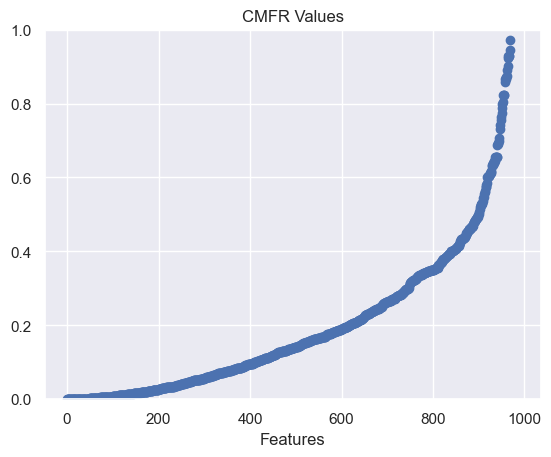

In [18]:
# Change feature names to numbers for plotting
for entryNum, entry in enumerate(sorteddf[2]):
    sorteddf.iloc[entryNum,0] = entryNum

# Locate knee / elbow point
#kneedle = KneeLocator(sorteddf.iloc[:,0].tolist(),sorteddf.iloc[:,1].tolist(), S= 2.7, curve="convex", direction="increasing") #,interp_method='polynomial', polynomial_degree=20)
#kneedle.plot_knee()

# Print knee location
#print(f"Knee location: feature {kneedle.knee}")
#print(f"CMFR value: {sorteddf.iloc[kneedle.knee,1]}")
#print(f"2nd CMFR value: {sorteddf.iloc[kneedle.knee,1]-1}")

# Plot nRoA values of each feature from smallest to largest
sns.set_theme()
plt.pyplot.scatter(x= sorteddf.iloc[:,0],y = sorteddf.iloc[:,1])
plt.pyplot.title("CMFR Values")

plt.pyplot.ylim([0,1])
plt.pyplot.xlabel("Features")
plt.pyplot.ylabel("")
plt.pyplot.show()

In [10]:
# Sort data frame by SDFR values and export
sorteddf=df.sort_values(by = 2)
sorteddf.to_excel(r"/Users/ilanadeutsch/Desktop/sorted_SDFR_vals.xlsx")

Knee location: feature 955
CSDFR value: 3.710537322072767


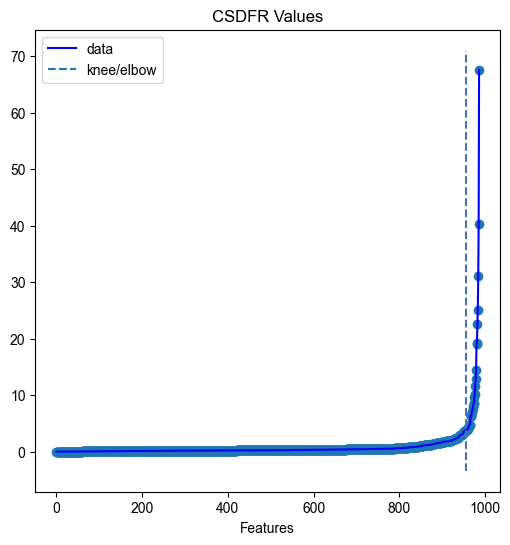

In [11]:
# Change feature names to numbers for plotting
for entryNum, entry in enumerate(sorteddf[2]):
    sorteddf.iloc[entryNum,0] = entryNum

# Locate knee / elbow point
kneedle = KneeLocator(sorteddf.iloc[:,0].tolist(),sorteddf.iloc[:,2].tolist(), S= 2.7, curve="convex", direction="increasing")
kneedle.plot_knee()

# Print knee location
print(f"Knee location: feature {kneedle.knee}")
print(f"CSDFR value: {sorteddf.iloc[kneedle.knee,2]}")

# Plot nRoA values of each feature from smallest to largest
sns.set_theme()
plt.pyplot.scatter(x= sorteddf.iloc[:,0],y = sorteddf.iloc[:,2])
plt.pyplot.title("CSDFR Values")
plt.pyplot.xlabel("Features")
plt.pyplot.ylabel("")
plt.pyplot.show()